# Importing Libraries

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as statistics

# Conncting to the API

In [2]:
client_credentials_manager = SpotifyClientCredentials(client_id='1bac45126b4241dcb9e91a2d05402b41', client_secret='e9519a18986d468da57732bac2b70b91')
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [3]:
#Function to get track ID in the playlist
def getTrackIDs(playlist_id):
    ids = []
    playlist = sp.playlist(playlist_id)
    for item in playlist['tracks']['items']:
        track = item['track']
        ids.append(track['id'])
    return ids

ids = getTrackIDs('37i9dQZF1DWUXSVcZljKtz')

In [18]:
print(len(ids))

50


In [4]:
#Function to get track metadata and features
def getTrackFeatures(id):
    meta = sp.track(id)
    features = sp.audio_features(id)

    # meta
    name = meta['name']
    length = meta['duration_ms']
    popularity = meta['popularity']

    # features
    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    valence= features[0]['valence']
    time_signature = features[0]['time_signature']
 

    track = [length, popularity, danceability, acousticness, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, time_signature]
    return track

In [124]:
# loop over track ids 
tracks = []
for i in range(len(ids)):
    time.sleep(.5)
    track = getTrackFeatures(ids[i])
    tracks.append(track)

# create dataset
df = pd.DataFrame(tracks, columns = ['length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo','valence', 'time_signature'])
#df
df.to_csv("spotify.csv", sep = ',')

# Exploring the Data

In [5]:
df=pd.read_csv(r'C:\Users\kibe\Desktop\Projects\Spotify Analysis\spotify.csv')

In [6]:
df.sample(5)

,Unnamed: 0,name,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature
33,33,Nyaranyara,271516,30,0.801,0.233,0.744,0.000000,0.1480,-4.797,0.3220,129.822,0.576,4
38,38,Peddi,227360,29,0.706,0.361,0.320,0.000041,0.1020,-15.846,0.0400,92.002,0.257,4
40,40,"Avoid Those People ft. Boutross, Breeder LW, A...",529162,33,0.841,0.456,0.635,0.000000,0.0524,-6.446,0.3580,141.897,0.643,4
32,32,El Shaddai,268480,29,0.641,0.296,0.616,0.000000,0.2370,-5.175,0.1810,162.049,0.782,4
1,1,Ex,204000,46,0.640,0.328,0.464,0.000000,0.2250,-7.564,0.0876,90.029,0.294,4


In [37]:
df.duplicated().sum()

0

In [38]:
df.isnull().sum()

Unnamed: 0          0
name                0
length              0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
time_signature      0
dtype: int64

In [39]:
df.dtypes

Unnamed: 0            int64
name                 object
length                int64
popularity          float64
danceability        float64
acousticness        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
time_signature        int64
dtype: object

In [7]:
df.drop("name", axis=1, inplace=True)
df.drop("Unnamed: 0", axis=1, inplace=True)


# Visualization

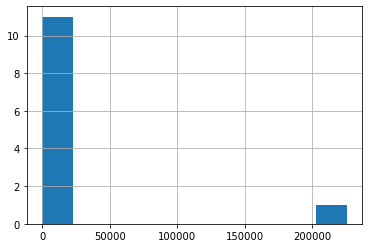

In [18]:
#to find out the average track features of the top 50 songs 
df.mean().hist()
plt.show()

<b>We will have to scale down the values<b/> 

<b>I want to compare the mean of the values above with a newly releaased track. I chose I chose 'Dala Wa' by Mejja released on 21st October 2022 (6days ago).<b/> 

In [9]:
#to get features of the Mejja song using the trackID
track_features=[]
track=getTrackFeatures('3vwCLR1fyjeMCkPFfnfnHL')
track_features.append(track)
#track_features
single_track_df = pd.DataFrame(track_features, columns = ['length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo','valence', 'time_signature'])

#single_track_df.drop("name", axis=1, inplace=True)
single_track_df

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature
0,216470,16,0.686,0.273,0.689,0,0.0588,-5.251,0.188,102.056,0.419,4


In [10]:
#joining the two dataframes and then scaling them down
new_df = df.append([single_track_df])
new_df


C:\Users\kibe\AppData\Local\Temp\ipykernel_8280\2294614989.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = df.append([single_track_df])


,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature
0,220755,39,0.740,0.10200,0.641,0.000000,0.1210,-9.494,0.0863,79.022,0.324,4
1,204000,46,0.640,0.32800,0.464,0.000000,0.2250,-7.564,0.0876,90.029,0.294,4
2,220310,37,0.779,0.30000,0.488,0.000000,0.0757,-10.387,0.0366,135.974,0.712,4
3,196500,35,0.917,0.10100,0.681,0.000033,0.0919,-7.564,0.0786,109.986,0.719,4
4,198582,35,0.535,0.70700,0.559,0.000000,0.1240,-5.690,0.0856,159.957,0.762,4
5,191797,27,0.901,0.56000,0.476,0.000015,0.1040,-7.618,0.3110,89.028,0.616,4
6,213029,46,0.731,0.24100,0.794,0.000002,0.1220,-4.630,0.1380,177.970,0.723,4
7,187555,37,0.726,0.15200,0.706,0.000587,0.0291,-3.448,0.3430,119.896,0.555,3
8,227865,34,0.894,0.05500,0.653,0.000000,0.1010,-6.933,0.3190,93.990,0.750,4
9,201723,39,0.913,0.08040,0.857,0.000018,0.0786,-5.854,0.2160,98.017,0.853,4


In [11]:
#scaling down the whole dataframe
from sklearn.preprocessing import MinMaxScaler

# Creating an instance of the sklearn.preprocessing.MinMaxScaler()
scaler = MinMaxScaler()
#scaling the whole dataframe
scaler=MinMaxScaler()
scaler.fit(new_df)
scaled=scaler.fit_transform(new_df)
scaled_df=pd.DataFrame(scaled, columns=new_df.columns)
scaled_df

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature
0,0.133608,0.837209,0.651543,0.142501,0.560380,0.000000,0.136573,0.493666,0.126656,0.021522,0.223430,0.5
1,0.086539,1.000000,0.470054,0.462823,0.320217,0.000000,0.291128,0.643662,0.129969,0.115157,0.187198,0.5
2,0.132358,0.790698,0.722323,0.423137,0.352782,0.000000,0.069252,0.424264,0.000000,0.506002,0.692029,0.5
3,0.065470,0.744186,0.972777,0.141083,0.614654,0.000226,0.093327,0.643662,0.107034,0.284927,0.700483,0.5
4,0.071318,0.744186,0.279492,1.000000,0.449118,0.000000,0.141031,0.789306,0.124873,0.710020,0.752415,0.5
5,0.052258,0.558140,0.943739,0.791649,0.336499,0.000098,0.111309,0.639465,0.699286,0.106641,0.576087,0.5
6,0.111904,1.000000,0.635209,0.339513,0.767978,0.000015,0.138059,0.871687,0.258410,0.863253,0.705314,0.5
7,0.040341,0.790698,0.626134,0.213368,0.648575,0.003966,0.000000,0.963550,0.780836,0.369229,0.502415,0.0
8,0.153582,0.720930,0.931034,0.075885,0.576662,0.000000,0.106851,0.692702,0.719674,0.148852,0.737923,0.5
9,0.080142,0.837209,0.965517,0.111886,0.853460,0.000121,0.073562,0.776560,0.457187,0.183109,0.862319,0.5


In [12]:
#separatingthe row with the mejja track features
scaled_single_track_df=scaled_df.iloc[50]
scaled_single_track_df

length              0.121570
popularity          0.302326
danceability        0.553539
acousticness        0.384868
energy              0.625509
instrumentalness    0.000000
liveness            0.044137
loudness            0.823424
speechiness         0.385831
tempo               0.217468
valence             0.338164
time_signature      0.500000
Name: 50, dtype: float64

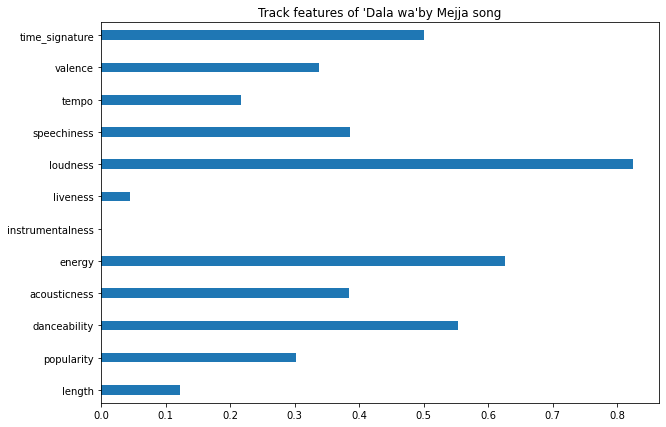

In [13]:
#viewing the track features on a graph
scaled_single_track_df.plot(kind='barh',figsize = (10,7), width = 0.3)
plt.title("Track features of 'Dala wa'by Mejja song")
plt.show()

In [14]:
#dropping the mejja song track features row
scaled_df=scaled_df.drop(scaled_df. index[50]) 

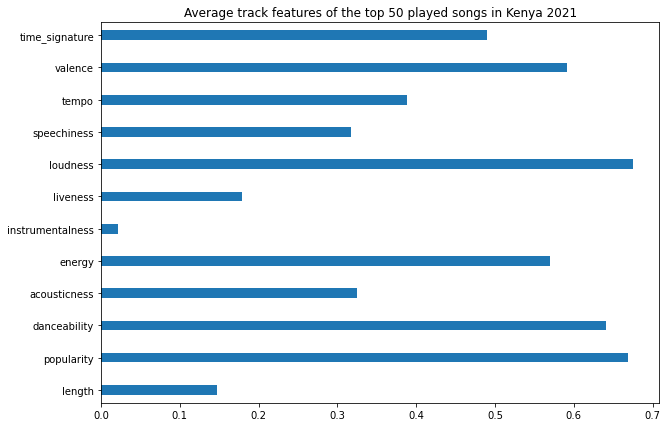

In [15]:
#displaying the average track features of the top 50 songs
scaled_df.mean().plot(kind='barh',figsize = (10,7), width = 0.3)
plt.title("Average track features of the top 50 played songs in Kenya 2021")
plt.show()

<b>Now to compare the two plots<b/>

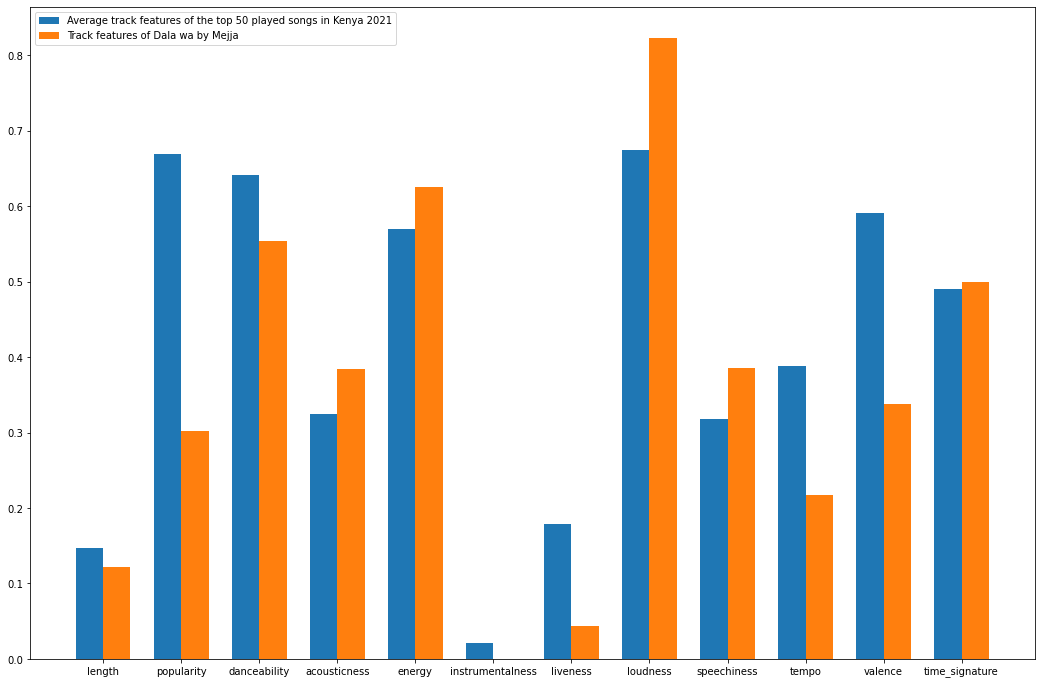

In [26]:

labels = ['length','popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo','valence', 'time_signature']
average = scaled_df.mean()
single = scaled_single_track_df

x = np.arange(len(labels))  # the label locations
width = 0.35 # the width of the bars

fig, ax = plt.subplots(figsize=(18,12))
rects1 = ax.bar(x - width/2, average, width, label='Average track features of the top 50 played songs in Kenya 2021')
rects2 = ax.bar(x + width/2, single, width, label='Track features of Dala wa by Mejja ')

# Add some text for labels, title and custom x-axis tick labels, etc.


ax.set_xticks( x,labels)
ax.legend()






To find the correlation to popularity

In [50]:
correlation_matrix = scaled_df.corr()
correlation_matrix['popularity'].sort_values(ascending = False)

popularity          1.000000
acousticness        1.000000
speechiness         0.371407
valence             0.240267
energy              0.184150
loudness            0.105215
time_signature     -0.033897
liveness           -0.043517
instrumentalness   -0.076792
danceability       -0.134930
length             -0.148419
tempo              -0.183075
Name: popularity, dtype: float64

In [19]:
scaled_df_=scaled_df.reset_index()
scaled_df_.sample()

,index,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature
46,46,0.06329,0.604651,0.834846,0.172265,0.446404,0.000015,0.182642,0.483485,0.367992,0.58326,0.861111,0.5


In [21]:
correlation_matrix = scaled_df_.corr()
correlation_matrix['index'].sort_values(ascending = False)

index               1.000000
liveness            0.232472
length              0.204162
loudness            0.086757
energy              0.082209
instrumentalness    0.061621
time_signature      0.059608
tempo               0.040365
valence             0.000989
speechiness        -0.028327
acousticness       -0.045130
danceability       -0.148345
popularity         -0.375437
Name: index, dtype: float64

In [20]:
correlation_matrix = scaled_df_.corr(method ='pearson')
correlation_matrix['index'].sort_values(ascending = False)

index               1.000000
liveness            0.232472
length              0.204162
loudness            0.086757
energy              0.082209
instrumentalness    0.061621
time_signature      0.059608
tempo               0.040365
valence             0.000989
speechiness        -0.028327
acousticness       -0.045130
danceability       -0.148345
popularity         -0.375437
Name: index, dtype: float64